# Part 1 - Object Oriented Programming: Neuron Class Hierarchy

In [ ]:
class Neuron:
    def __init__(self, firing_rate=0):
        self.firing_rate = firing_rate
    
    def activate(self, stimulus):
        """Calculating the firing rate based on stimulus strength"""
        pass

class SensoryNeuron(Neuron):
    def __init__(self, firing_rate=0, receptor_type=None):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type
    
    def sense_stimulus(self, stimulus):
        """Process specific stimulus and activate neuron"""
        pass

class MotorNeuron(Neuron):
    def __init__(self, firing_rate=0, target_muscle=None):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle
    
    def control_muscle(self):
        """Control muscle based on activation level"""
        pass

class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="light")
    
    def sense_stimulus(self, light_intensity):
        """Override to handle light-specific detection"""
        pass
    
    def light_detection(self, light_intensity):
        pass

class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="pressure")
    
    def sense_stimulus(self, pressure):
        """Override to handle pressure-specific detection"""
        pass
    
    def pressure_detection(self, pressure):
        pass

class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="skeletal muscle")
    
    def control_muscle(self):
        """Override for skeletal muscle specific control"""
        pass
    
    def skeletal_muscle_control(self):
        """Specific skeletal muscle control mechanism"""
        pass

class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="muscle spindle")
    
    def control_muscle(self):
        """Override for muscle spindle specific control"""
        pass
    
    def muscle_spindle_control(self):
        """Specific muscle spindle control mechanism"""
        pass

# Part 2 - Data Analysis with NumPy, Pandas, and Matplotlib

In [1]:
pip install numpy matplotlib pandas

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 1.1 MB/s eta 0:00:11
   -- ------------------------------------- 0.8/12.6 MB 1.1 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/12.6 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.3/12.6 MB 1.2 MB/s eta 0:00:10
   ----- ---------------------------------- 1.6/12.6 MB 1.2 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.6 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.6 MB 1.2 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.6 MB 1.2 MB/s eta 0:00:09
   -------- ------------------------------- 2.6/12.6 MB 1.2 MB/s eta 0:00:08
   ---------- ----------------------------- 3.1/12.6 MB 1.3 MB/s eta 0:00:08
   ---------- ------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1: Sinusoidal Signal Processing

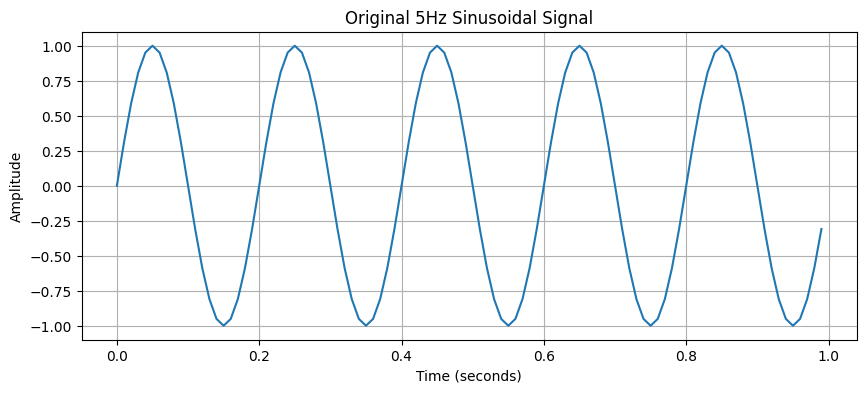

In [2]:
# Create time axis - sampling every 0.01 seconds for one second
t = np.arange(0, 1, 0.01)

# Create 5Hz sinusoidal signal
signal = np.sin(2 * np.pi * 5 * t)

# Display the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Original 5Hz Sinusoidal Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

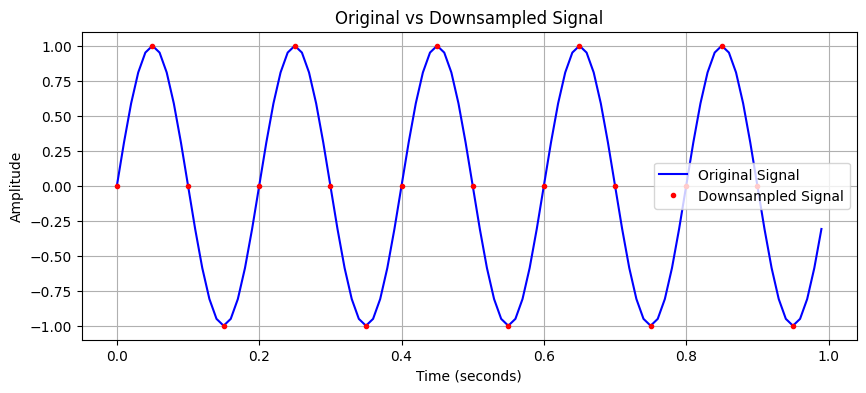

Signal reduced by 80.0%


In [3]:
def downsample_signal(signal, t):
    # Find local maxima and minima
    peaks = []
    for i in range(1, len(signal)-1):
        # Check if point is maximum or minimum
        if signal[i-1] < signal[i] > signal[i+1] or signal[i-1] > signal[i] < signal[i+1]:
            peaks.append(i)
    
    # Sample every 5th point (to get ~20% of original signal)
    regular_samples = list(range(0, len(signal), 5))
    
    # Combine peak points and regular samples
    all_points = sorted(list(set(peaks + regular_samples)))
    
    return t[all_points], signal[all_points]

# Test the function
t_new, signal_new = downsample_signal(signal, t)

# Plot both signals for comparison
plt.figure(figsize=(10, 4))
plt.plot(t, signal, 'b-', label='Original Signal')
plt.plot(t_new, signal_new, 'r.', label='Downsampled Signal')
plt.title('Original vs Downsampled Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Print the reduction percentage
reduction = (1 - len(signal_new)/len(signal)) * 100
print(f"Signal reduced by {reduction:.1f}%")

- Input: 5Hz sinusoidal signal sampled at 0.01s intervals
- Output: ~20% of original signal length

## Q2: Laptop Price Dataset Analysis

### Task 1: Price Distribution

In [ ]:
import pandas as pd

# First of all I made it read the dataset:
df = pd.read_csv('laptop_price - dataset.csv')

# Display me the first few rows to check if data was loaded correctly
print(df.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

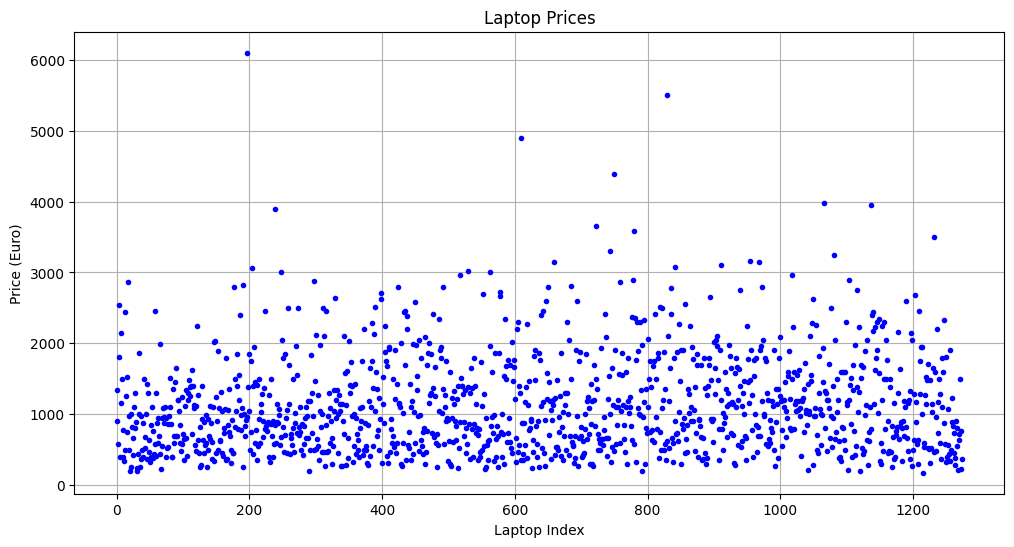

Number of laptops: 1275
Price range: 174.00 - 6099.00 euros
Average price: 1134.97 euros


In [ ]:
import matplotlib.pyplot as plt

# Plot the price of all laptops
plt.figure(figsize=(12, 6))
plt.plot(df['Price (Euro)'], 'b.')
plt.title('Laptop Prices')
plt.xlabel('Laptop Index')
plt.ylabel('Price (Euro)')
plt.grid(True)
plt.show()

# Print statistics
print(f"Number of laptops: {len(df)}")
print(f"Price range: {df['Price (Euro)'].min():.2f} - {df['Price (Euro)'].max():.2f} euros")
print(f"Average price: {df['Price (Euro)'].mean():.2f} euros")

### Task 2: Company Price Analysis

Average laptop prices by company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


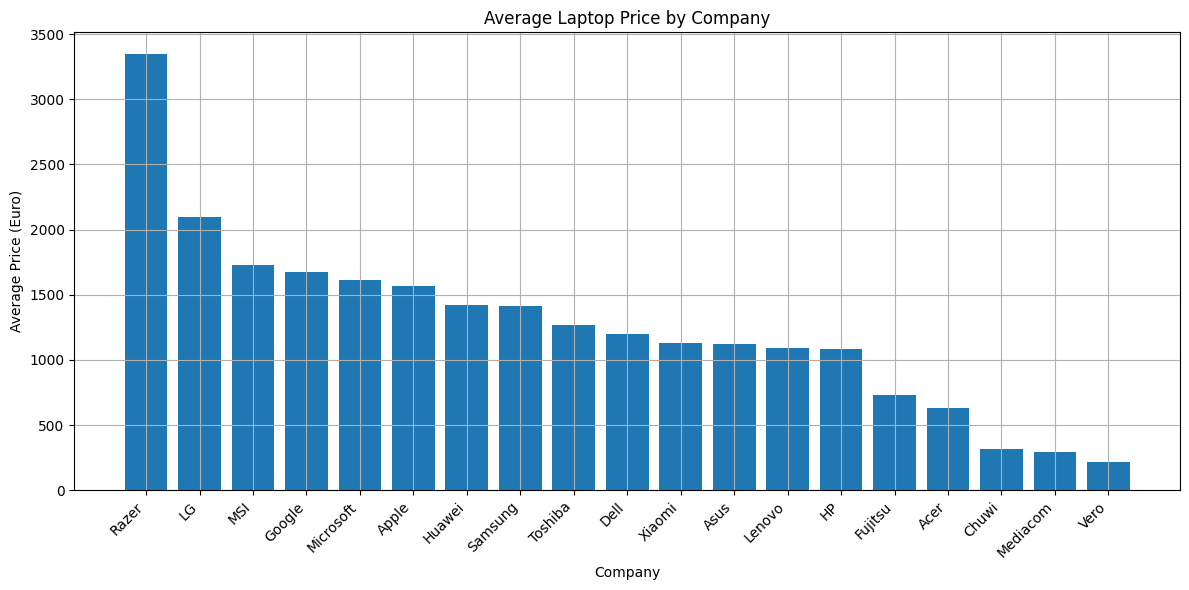

In [ ]:
# Calculate average price by company
avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

# Show results
print("Average laptop prices by company:")
print(avg_price_by_company)

# Create a bar plot of average prices
plt.figure(figsize=(12, 6))
plt.bar(avg_price_by_company.index, avg_price_by_company.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euro)')
plt.grid(True)
plt.tight_layout()  # I don't want the x labels to be cut off
plt.show()

What I've noticed:
- Razer has the highest average prices
- Followed by LG and MSI
- Most companies fall in the mid-range price segment

### Task 3: Operating Systems Analysis

In [ ]:
# Show me all the unique operating systems in the dataset
print("Unique operating systems in the dataset:")
print(df['OpSys'].unique())

Unique operating systems in the dataset:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [ ]:
# In order to standardize the OS names
def standardize_os(os_name):
    os_name = str(os_name).lower()  # Converting it to lowercase 
    
    if 'mac' in os_name:
        return 'macOS'
    elif 'windows' in os_name:
        return 'Windows'
    elif 'linux' in os_name:
        return 'Linux'
    elif 'android' in os_name:
        return 'Android'
    elif 'chrome' in os_name:
        return 'Chrome OS'
    elif 'no os' in os_name:
        return 'No OS'
    else:
        return os_name

# Create new column with standardized OS names
df['OS_Standardized'] = df['OpSys'].apply(standardize_os)

# Display unique values in the new standardized column
print("Standardized operating systems:")
print(df['OS_Standardized'].unique())

# Display count of each OS
print("\nCount of each operating system:")
print(df['OS_Standardized'].value_counts())

Standardized operating systems:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']

Count of each operating system:
OS_Standardized
Windows      1101
No OS          66
Linux          58
Chrome OS      27
macOS          21
Android         2
Name: count, dtype: int64


- Windows is leading with 1101 laptops
- After Windows there are No OS (66) and Linux (58)
- Chrome OS (27) and macOS (21) less common
- Android at the bottom (2 laptops)

### Task 4: Operating System Price Distribution

C:\Users\sagih\AppData\Local\Temp\ipykernel_6660\2376000562.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['OS_Standardized'] == os]['Price (Euro)']


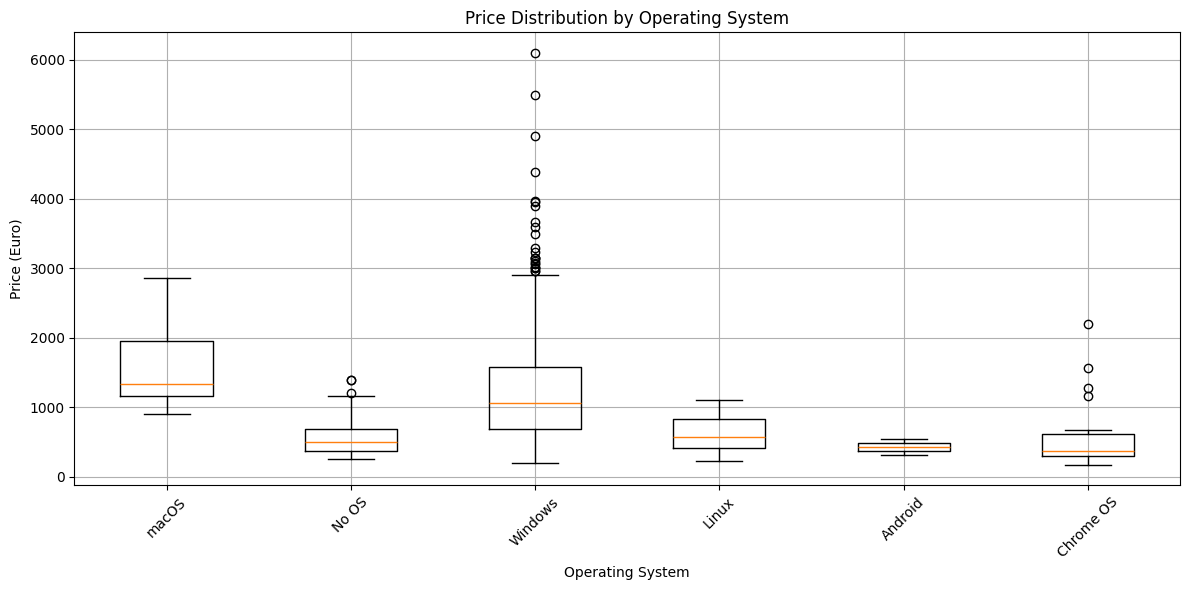

In [12]:
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['OS_Standardized'] == os]['Price (Euro)'] 
            for os in df['OS_Standardized'].unique()],
            labels=df['OS_Standardized'].unique())

plt.title('Price Distribution by Operating System')
plt.ylabel('Price (Euro)')
plt.xlabel('Operating System')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

what I've noticed:
- macOS shows higher average prices
- Windows shows the widest price range

### Task 5: RAM vs Price Analysis

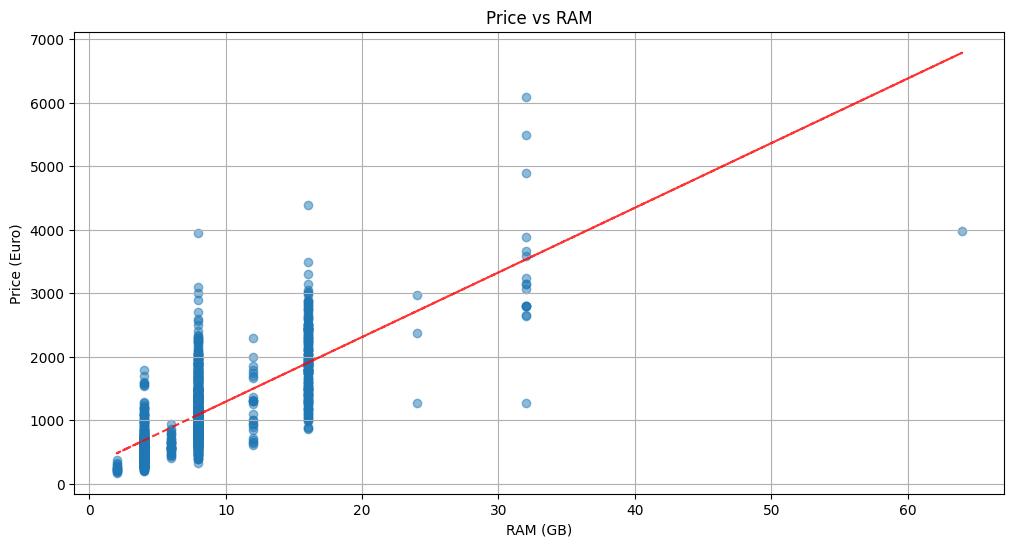

Correlation between RAM and Price: 0.74


In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.5)
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.grid(True)

# Add trend line
z = np.polyfit(df['RAM (GB)'], df['Price (Euro)'], 1)
p = np.poly1d(z)
plt.plot(df['RAM (GB)'], p(df['RAM (GB)']), "r--", alpha=0.8)

plt.show()

# Calculate correlation
correlation = df['RAM (GB)'].corr(df['Price (Euro)'])
print(f"Correlation between RAM and Price: {correlation:.2f}")

what I've noticed:
- Positive correlation (0.74)
- Higher RAM generally indicates higher prices
- A lot of variation within RAM categories

### Task 6: Storage Type Analysis

In [14]:
print("Sample values from Memory column:")
print(df['Memory'].head(10))

Sample values from Memory column:
0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
5              500GB HDD
6    256GB Flash Storage
7    256GB Flash Storage
8              512GB SSD
9              256GB SSD
Name: Memory, dtype: object


In [ ]:
def extract_storage_type(memory_str):
    memory_str = str(memory_str).upper()
    if 'SSD' in memory_str:
        return 'SSD'
    elif 'HDD' in memory_str:
        return 'HDD'
    elif 'FLASH' in memory_str:
        return 'Flash Storage'
    else:
        return 'Other'

# Create new column with storage type
df['Storage_Type'] = df['Memory'].apply(extract_storage_type)

# Display counts of each storage type
print("\nCount of each storage type:")
print(df['Storage_Type'].value_counts())

# Display a few examples
print("\nSample rows with original Memory and new Storage_Type:")
print(df[['Memory', 'Storage_Type']].head(10))


Count of each storage type:
Storage_Type
SSD              837
HDD              360
Flash Storage     70
Other              8
Name: count, dtype: int64

Sample rows with original Memory and new Storage_Type:
                Memory   Storage_Type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
5            500GB HDD            HDD
6  256GB Flash Storage  Flash Storage
7  256GB Flash Storage  Flash Storage
8            512GB SSD            SSD
9            256GB SSD            SSD


what I've noticed: 
- SSD most common (837 laptops)
- HDD second most common (360 laptops)
- Flash Storage less common (70 laptops)
- Small number of other storage types (8 laptops)

C:\Users\sagih\AppData\Local\Temp\ipykernel_6660\2332042566.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['CPU_Class'] == cpu]['Price (Euro)']


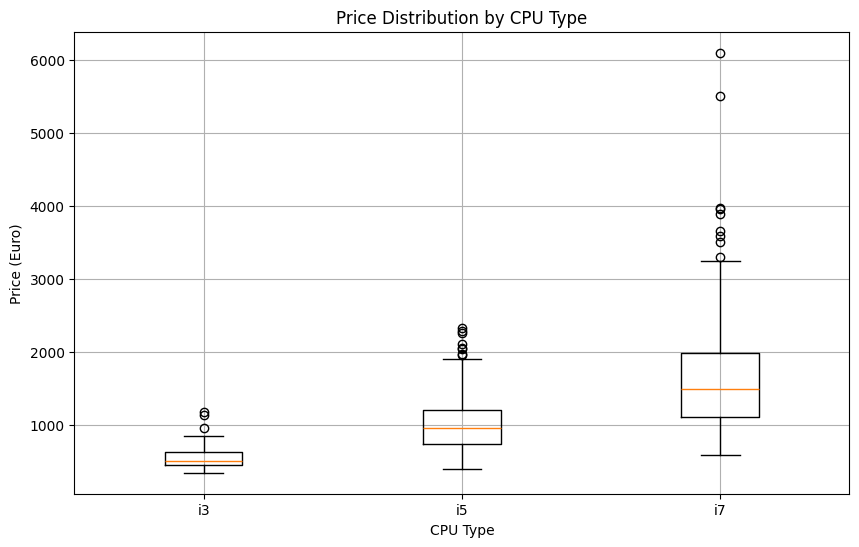

Average prices by CPU type:
CPU_Class
Other     564.87
i3        542.86
i5       1015.02
i7       1612.28
Name: Price (Euro), dtype: float64


In [ ]:
#bonus_question_1: "Are computers with i7 processors significantly more expensive than computers with i5?"

# Create a function to classify CPU types
def classify_cpu(cpu_type):
    if 'i7' in cpu_type.lower():
        return 'i7'
    elif 'i5' in cpu_type.lower():
        return 'i5'
    elif 'i3' in cpu_type.lower():
        return 'i3'
    else:
        return 'Other'

# Create new column for CPU classification
df['CPU_Class'] = df['CPU_Type'].apply(classify_cpu)

# Create box plot for price distribution by CPU type
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['CPU_Class'] == cpu]['Price (Euro)'] 
            for cpu in ['i3', 'i5', 'i7']],
            labels=['i3', 'i5', 'i7'])
plt.title('Price Distribution by CPU Type')
plt.ylabel('Price (Euro)')
plt.xlabel('CPU Type')
plt.grid(True)
plt.show()

# Print average prices for each CPU type
print("Average prices by CPU type:")
print(df.groupby('CPU_Class')['Price (Euro)'].mean().round(2))

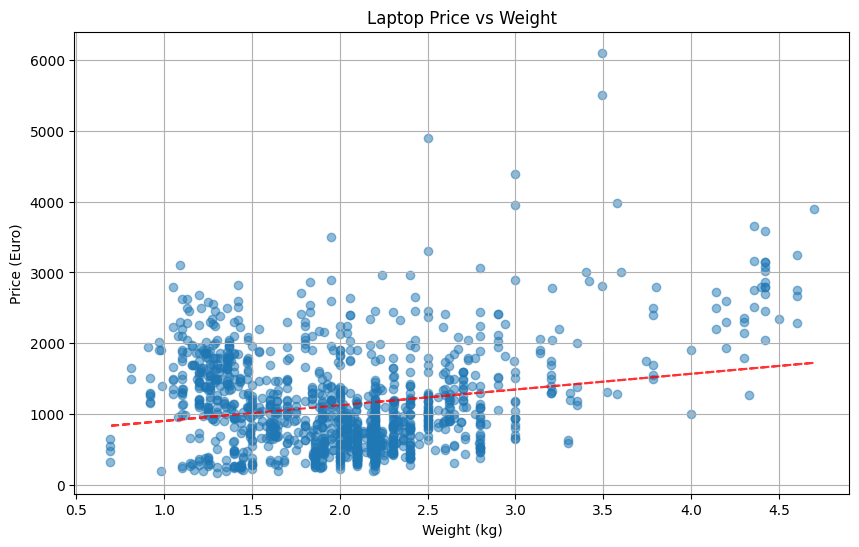


Correlation between Weight and Price: 0.21


In [17]:
#bonus_question_2: "Do lighter computers tend to be more expensive?"

# Create scatter plot of weight vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight (kg)'], df['Price (Euro)'], alpha=0.5)
plt.title('Laptop Price vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euro)')
plt.grid(True)

# Add trend line
z = np.polyfit(df['Weight (kg)'], df['Price (Euro)'], 1)
p = np.poly1d(z)
plt.plot(df['Weight (kg)'], p(df['Weight (kg)']), "r--", alpha=0.8)

plt.show()

# Calculate correlation
correlation = df['Weight (kg)'].corr(df['Price (Euro)'])
print(f"\nCorrelation between Weight and Price: {correlation:.2f}")

# My bonus questions analysis

## Question 1: 
Analysis of the relationship between CPU type (i3, i5, i7) and laptop prices:
- I can see that the price increase with CPU tier progression (i3 -> i5 -> i7)
- i7 processors show the highest average prices
- I can tell that CPU type is a significant factor in determining laptop price

## Question 2: 
Analysis of the correlation between laptop weight and price:
- Positive correlation
- I see just a slight price increase with weight increase
- Not a strong determinant of price
- Many expensive laptops are actually lightweight
- Overall the relationship is not as straightforward as I expected